q1

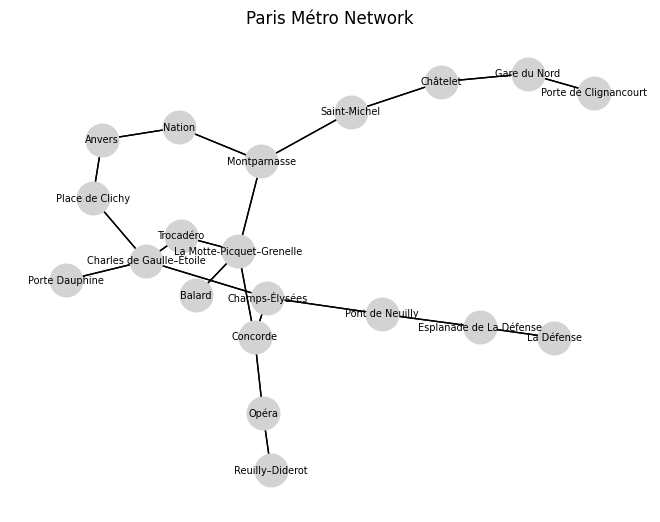

In [102]:
import networkx as nx
import matplotlib.pyplot as plt

#plot of graphical visualization
paris_metro = nx.Graph()

#5 lines with paris metro stations
routes = {
    "Line 1": ["La Défense", "Esplanade de La Défense", "Pont de Neuilly", "Champs-Élysées", "Concorde"],
    "Line 2": ["Porte Dauphine", "Charles de Gaulle–Étoile", "Place de Clichy", "Anvers", "Nation"],
    "Line 4": ["Porte de Clignancourt", "Gare du Nord", "Châtelet", "Saint-Michel", "Montparnasse"],
    "Line 6": ["Charles de Gaulle–Étoile", "Trocadéro", "La Motte-Picquet–Grenelle", "Montparnasse", "Nation"],
    "Line 8": ["Balard", "La Motte-Picquet–Grenelle", "Concorde", "Opéra", "Reuilly–Diderot"],
}

#nodes and edges
for route, stops in routes.items():
    paris_metro.add_nodes_from(stops)
    for i in range(len(stops) - 1):
        paris_metro.add_edge(stops[i], stops[i + 1], route=route)

#intersection stations
intersections = [
    ("Champs-Élysées", "Charles de Gaulle–Étoile"),
    ("Montparnasse", "La Motte-Picquet–Grenelle"),
    ("Concorde", "Opéra"),
    ("Gare du Nord", "Châtelet"),
]

for stop1, stop2 in intersections:
    paris_metro.add_edge(stop1, stop2, route="Intersection")

#plot and color
layout_pos = nx.spring_layout(paris_metro, seed=24)
edge_colors = []

#default colour added
for start, end, adttributes in paris_metro.edges(data=True):
    if adttributes["route"] == "Intersection":
        edge_colors.append("gray")
    else:
        edge_colors.append(adttributes["route"])

#graph plotteed
nx.draw(paris_metro, layout_pos, with_labels=True, node_size=550, node_color="lightgrey", font_size=7)
nx.draw_networkx_edges(paris_metro, layout_pos)

plt.title("Paris Métro Network")
plt.show()


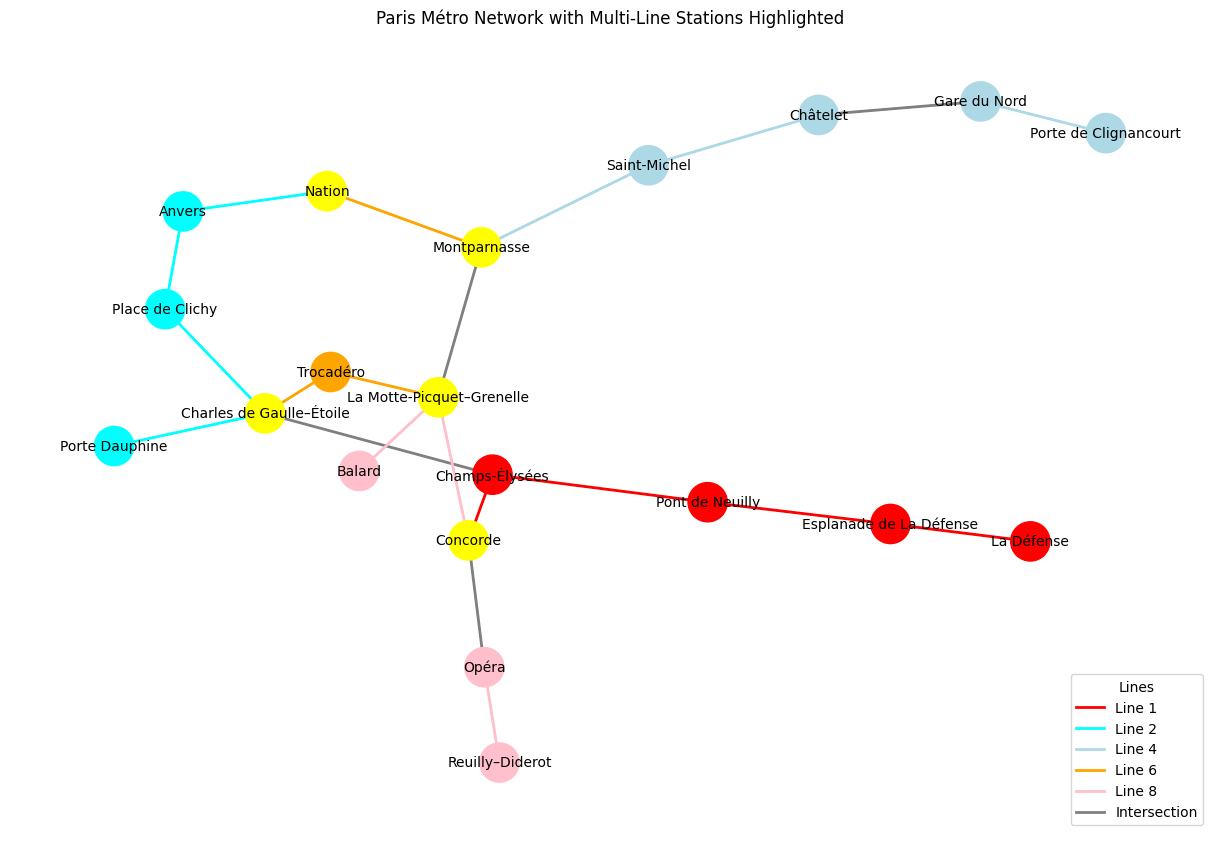

In [73]:
import networkx as nx
import matplotlib.pyplot as plt

#graph
paris_metro = nx.Graph()

#5 lines with stations
routes = {
    "Line 1": ["La Défense", "Esplanade de La Défense", "Pont de Neuilly", "Champs-Élysées", "Concorde"],
    "Line 2": ["Porte Dauphine", "Charles de Gaulle–Étoile", "Place de Clichy", "Anvers", "Nation"],
    "Line 4": ["Porte de Clignancourt", "Gare du Nord", "Châtelet", "Saint-Michel", "Montparnasse"],
    "Line 6": ["Charles de Gaulle–Étoile", "Trocadéro", "La Motte-Picquet–Grenelle", "Montparnasse", "Nation"],
    "Line 8": ["Balard", "La Motte-Picquet–Grenelle", "Concorde", "Opéra", "Reuilly–Diderot"],
}

#nodes and edges
for route, stops in routes.items():
    for stop in stops:
        #station to the graph, track the lines it belongs to
        if stop not in paris_metro.nodes:
            paris_metro.add_node(stop, routes={route})
        else:
            paris_metro.nodes[stop]['routes'].add(route)
    for i in range(len(stops) - 1):
        paris_metro.add_edge(stops[i], stops[i + 1], route=route)


# Shared stations:
intersections = [
    ("Champs-Élysées", "Charles de Gaulle–Étoile"),
    ("Montparnasse", "La Motte-Picquet–Grenelle"),
    ("Concorde", "Opéra"),
    ("Gare du Nord", "Châtelet"),
]

for stop1, stop2 in intersections:
    paris_metro.add_edge(stop1, stop2, route="Intersection")

# Visualization
layout_pos = nx.spring_layout(paris_metro, seed=24)  # For consistent layout

# Define a color map for the lines
color_map = {
    "Line 1": "red",
    "Line 2": "cyan",
    "Line 4": "lightblue",
    "Line 6": "orange",
    "Line 8": "pink",
    "Intersection": "gray"
}

#Colors to edges that depends on line
edge_colors = [color_map[attributes["route"]] for _, _, attributes in paris_metro.edges(data=True)]

#colors to nodes depends on lines
node_colors = []
for node, attributes in paris_metro.nodes(data=True):
    if len(attributes["routes"]) > 1:  # Multi-line station
        node_colors.append("yellow")
    else:
        # Use the color of the line the station primarily belongs to
        route = next(iter(attributes["routes"]))
        node_colors.append(color_map[route])

#graph plot
plt.figure(figsize=(12, 8))
nx.draw(paris_metro, layout_pos, with_labels=True, node_size=800, node_color=node_colors, font_size=10, font_color="black")
nx.draw_networkx_edges(paris_metro, layout_pos, edge_color=edge_colors, width=2)

#legend
route_legend = [plt.Line2D([0], [0], color=color, lw=2, label=route) for route, color in color_map.items()]
plt.legend(handles=route_legend, title="Lines", loc="lower right")

plt.title("Paris Métro Network with Multi-Line Stations Highlighted")
plt.show()


q2- paris metro DONT KNOW

Is the graph connected? True


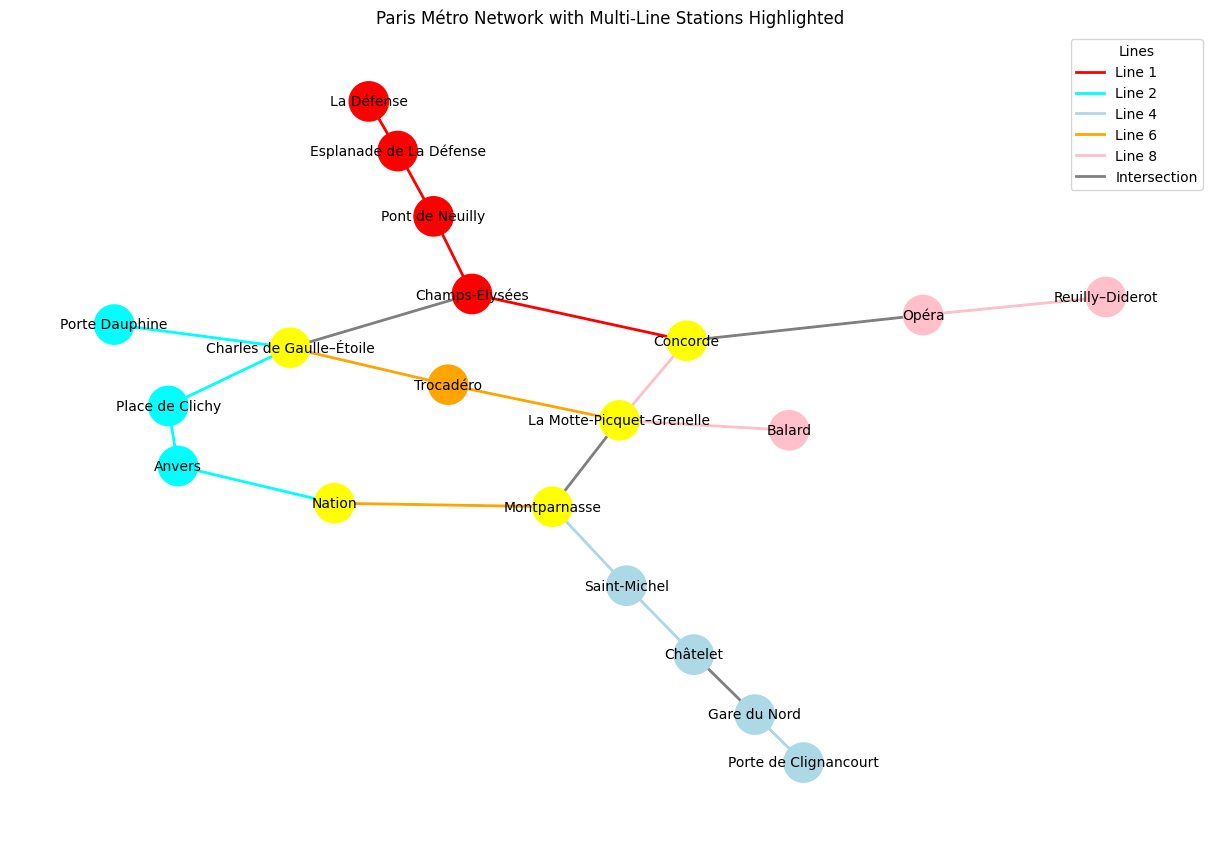

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
paris_metro = nx.Graph()

# Define 5 lines with stations
lines = {
    "Line 1": ["La Défense", "Esplanade de La Défense", "Pont de Neuilly", "Champs-Élysées", "Concorde"],
    "Line 2": ["Porte Dauphine", "Charles de Gaulle–Étoile", "Place de Clichy", "Anvers", "Nation"],
    "Line 4": ["Porte de Clignancourt", "Gare du Nord", "Châtelet", "Saint-Michel", "Montparnasse"],
    "Line 6": ["Charles de Gaulle–Étoile", "Trocadéro", "La Motte-Picquet–Grenelle", "Montparnasse", "Nation"],
    "Line 8": ["Balard", "La Motte-Picquet–Grenelle", "Concorde", "Opéra", "Reuilly–Diderot"],
}

# Add nodes and edges to the graph
for line, stations in lines.items():
    for station in stations:
        # Add station to the graph, track the lines it belongs to
        if station not in paris_metro.nodes:
            paris_metro.add_node(station, lines={line})
        else:
            paris_metro.nodes[station]['lines'].add(line)
    for i in range(len(stations) - 1):
        paris_metro.add_edge(stations[i], stations[i + 1], line=line)

# Ensure the graph is connected (adding intersections)
# Shared stations:
intersections = [
    ("Champs-Élysées", "Charles de Gaulle–Étoile"),
    ("Montparnasse", "La Motte-Picquet–Grenelle"),
    ("Concorde", "Opéra"),
    ("Gare du Nord", "Châtelet"),
]

for station1, station2 in intersections:
    paris_metro.add_edge(station1, station2, line="Intersection")

# Check if the graph is connected
is_connected = nx.is_connected(paris_metro)
print(f"Is the graph connected? {is_connected}")

# Visualization
pos = nx.spring_layout(paris_metro, seed=42)  # For consistent layout

# Define a color map for the lines
color_map = {
    "Line 1": "red",
    "Line 2": "cyan",
    "Line 4": "lightblue",
    "Line 6": "orange",
    "Line 8": "pink",
    "Intersection": "gray"
}

# Assign colors to edges based on line
edge_colors = [color_map[data["line"]] for _, _, data in paris_metro.edges(data=True)]

# Assign colors to nodes based on the number of lines they belong to
node_colors = []
for node, data in paris_metro.nodes(data=True):
    if len(data["lines"]) > 1:  # Multi-line station
        node_colors.append("yellow")
    else:
        # Use the color of the line the station primarily belongs to
        line = next(iter(data["lines"]))
        node_colors.append(color_map[line])

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw(paris_metro, pos, with_labels=True, node_size=800, node_color=node_colors, font_size=10, font_color="black")
nx.draw_networkx_edges(paris_metro, pos, edge_color=edge_colors, width=2)

# Add a legend for the lines
legend_elements = [plt.Line2D([0], [0], color=color, lw=2, label=line) for line, color in color_map.items()]
plt.legend(handles=legend_elements, title="Lines", loc="upper right")

plt.title("Paris Métro Network with Multi-Line Stations Highlighted")
plt.show()


q3

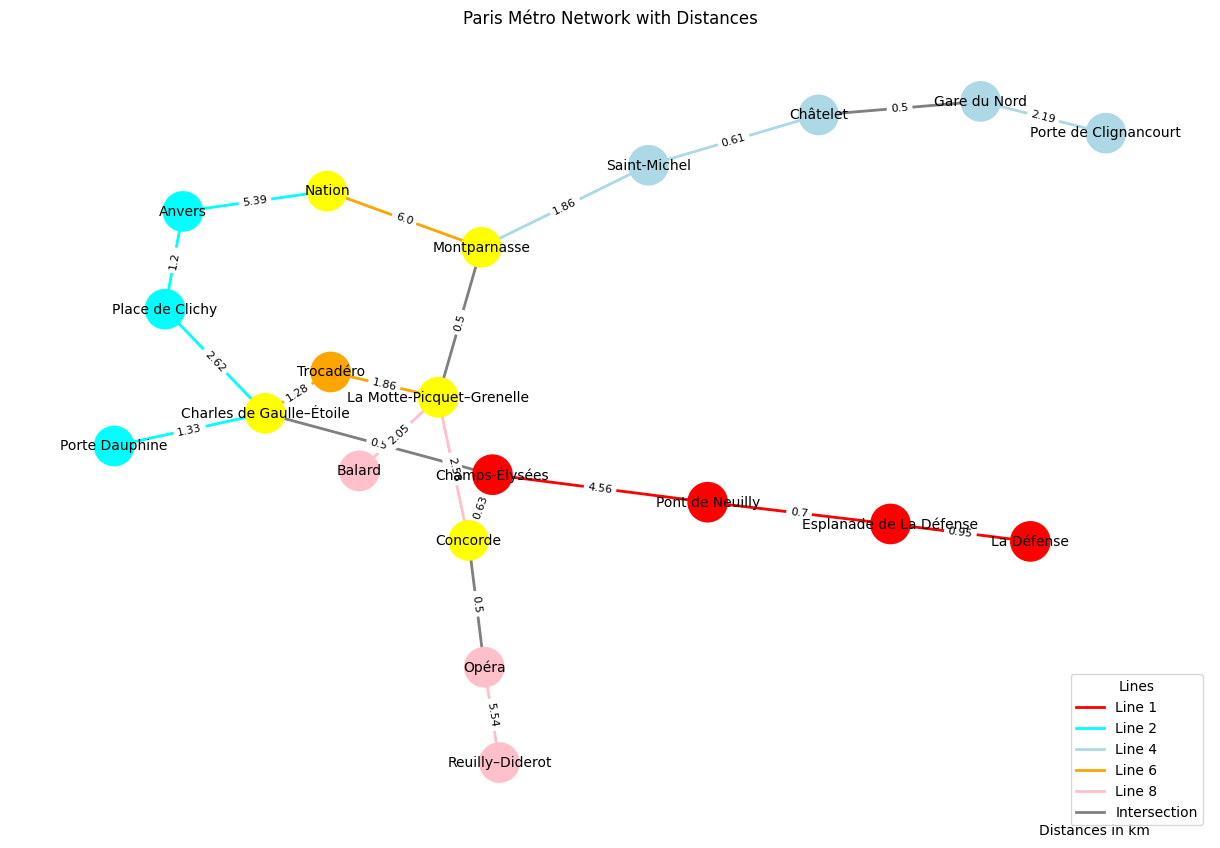

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

#graph
paris_metro = nx.Graph()

#5 lines with stations and distances between neighboring stations
routes_with_distances = {
    "Line 1": [
        ("La Défense", "Esplanade de La Défense", 0.95),
        ("Esplanade de La Défense", "Pont de Neuilly", 0.70),
        ("Pont de Neuilly", "Champs-Élysées", 4.56),
        ("Champs-Élysées", "Concorde", 0.63),
    ],
    "Line 2": [
        ("Porte Dauphine", "Charles de Gaulle–Étoile", 1.33),
        ("Charles de Gaulle–Étoile", "Place de Clichy", 2.62),
        ("Place de Clichy", "Anvers", 1.2),
        ("Anvers", "Nation", 5.39),
    ],
    "Line 4": [
        ("Porte de Clignancourt", "Gare du Nord", 2.19),
        ("Gare du Nord", "Châtelet", 2.69),
        ("Châtelet", "Saint-Michel", 0.61),
        ("Saint-Michel", "Montparnasse", 1.86),
    ],
    "Line 6": [
        ("Charles de Gaulle–Étoile", "Trocadéro", 1.28),
        ("Trocadéro", "La Motte-Picquet–Grenelle", 1.86),
        ("La Motte-Picquet–Grenelle", "Montparnasse", 1.8),
        ("Montparnasse", "Nation", 6.0),
    ],
    "Line 8": [
        ("Balard", "La Motte-Picquet–Grenelle", 2.05),
        ("La Motte-Picquet–Grenelle", "Concorde", 2.58),
        ("Concorde", "Opéra", 0.89),
        ("Opéra", "Reuilly–Diderot", 5.54),
    ],
}

#nodes and edges to the graph with distances as attributes
for line, edges in routes_with_distances.items():
    for station1, station2, distance in edges:
        # Update or create the node with the correct lines it belongs to
        if station1 not in paris_metro.nodes:
            paris_metro.add_node(station1, lines={line})
        else:
            paris_metro.nodes[station1]['lines'].add(line)

        if station2 not in paris_metro.nodes:
            paris_metro.add_node(station2, lines={line})
        else:
            paris_metro.nodes[station2]['lines'].add(line)

        # Add the edge with distance
        paris_metro.add_edge(station1, station2, line=line, distance=distance)

#FOR COURSEWORK CHANGED VARIABLE NAMES
#  #nodes and edges to the graph with distances as attributes
# for route, edges in routes_with_distances.items():
#     for stop1, stop2, distance in edges:
#         # Update or create the node with the correct routes it belongs to
#         if stop1 not in paris_metro.nodes:
#             paris_metro.add_node(stop1, routes={route})
#         else:
#             paris_metro.nodes[stop1]['routes'].add(route)

#         if stop2 not in paris_metro.nodes:
#             paris_metro.add_node(stop2, routes={route})
#         else:
#             paris_metro.nodes[stop2]['routes'].add(route)

#         # Add the edge with distance
#         paris_metro.add_edge(stop1, stop2, route=route, distance=distance)



#Shared stations
intersections = [
    ("Champs-Élysées", "Charles de Gaulle–Étoile"),
    ("Montparnasse", "La Motte-Picquet–Grenelle"),
    ("Concorde", "Opéra"),
    ("Gare du Nord", "Châtelet"),
]

for stop1, stop2 in intersections:
    paris_metro.add_edge(stop1, stop2, line="Intersection", distance=0.5)


# Visualization
pos = nx.spring_layout(paris_metro, seed=24)

#color the lines
color_map = {
    "Line 1": "red",
    "Line 2": "cyan",
    "Line 4": "lightblue",
    "Line 6": "orange",
    "Line 8": "pink",
    "Intersection": "gray",
}

#colors to edges
edge_colors = [color_map[data["line"]] for _, _, data in paris_metro.edges(data=True)]

#colors to nodes based on the number of lines they belong to
node_colors = []
for node, data in paris_metro.nodes(data=True):
    if len(data["lines"]) > 1:  # Multi-line station
        node_colors.append("yellow")
    else:
        # Use the color of the line the station primarily belongs to
        line = next(iter(data["lines"]))
        node_colors.append(color_map[line])

#plot graph
plt.figure(figsize=(12, 8))
nx.draw(paris_metro, pos, with_labels=True, node_size=800, node_color=node_colors, font_size=10, font_color="black")
nx.draw_networkx_edges(paris_metro, pos, edge_color=edge_colors, width=2)

#distances on edges
edgelabels = nx.get_edge_attributes(paris_metro, "distance")
nx.draw_networkx_edge_labels(paris_metro, pos, edge_labels=edgelabels, font_size=8)

#legend for lines
legend_elements = [plt.Line2D([0], [0], color=color, lw=2, label=line) for line, color in color_map.items()]
plt.legend(handles=legend_elements, title="Lines", loc="lower right")

plt.text(0.95, 0.01, 'Distances in km', verticalalignment='top', horizontalalignment='right', transform=plt.gca().transAxes, color='black', fontsize=10)

plt.title("Paris Métro Network with Distances")
plt.show()
